In [126]:
from qiskit import QuantumCircuit, execute
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
import qiskit.tools.jupyter
%qiskit_job_watcher
from IPython.display import Audio
import wave
import numpy as np
#start for the project

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [127]:
#minimum user input will just be for them to fill out the create quantum circuit function inthe backend
n = 5  #number of gates
backend = Aer.get_backend('statevector_simulator')
piano_states = []
guitar_states = []
bass_states = []
trumpet_states = []
def CreateQuantumCircuit(piano_input, guitar_input, bass_input, trumpet_input):
    cct = QuantumCircuit(4,1)
    piano_states = []
    guitar_states = []
    bass_states = []
    trumpet_states = []
    for i in range(n-1):
        cct.h(i-1)
    cct.barrier() 
    for i in range(n):
        if piano_input[i-1] == 'x': 
            cct.x(0)
        if piano_input[i-1] == 'y':
            cct.y(0)
        if piano_input[i-1] == 'z': 
            cct.z(0)
        piano_states.append(execute(cct, backend).result().get_statevector())
        if guitar_input[i-1] == 'x':
            cct.x(1)
        if guitar_input[i-1] == 'y':
            cct.y(1)
        if guitar_input[i-1] == 'z':
            cct.z(1)
        guitar_states.append(execute(cct, backend).result().get_statevector())
        if bass_input[i-1] == 'x':
            cct.x(2)
        if bass_input[i-1] == 'y': 
            cct.y(2)
        if bass_input[i-1] == 'z':
            cct.z(2)
        bass_states.append(execute(cct, backend).result().get_statevector())
        if trumpet_input[i-1] == 'x': 
            cct.x(3)
        if trumpet_input[i-1] == 'y':
            cct.y(3)
        if trumpet_input[i-1] == 'z': 
            cct.z(3)
        trumpet_states.append(execute(cct, backend).result().get_statevector())
        cct.barrier() 
        cct.draw('mpl')
    return piano_states, guitar_states, bass_states, trumpet_states, cct

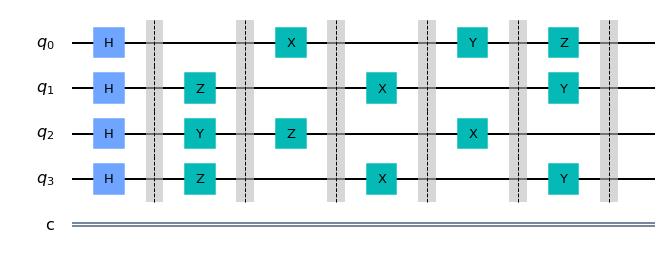

In [128]:
piano_states, guitar_states, bass_states, trumpet_states, cct = CreateQuantumCircuit(piano_input, guitar_input, bass_input, trumpet_input)
cct.draw(output="mpl")

In [129]:
def SeperateArrays(states, vals_real, vals_imaginary):
    vals = []
    for i in range(n+1):
        vals.append(states[i-1][0])
    for i in range(n+1):
        vals_real.append((states[i-1][0].real))
        vals_imaginary.append((states[i-1][0]).imag)
    return vals_real, vals_imaginary

In [109]:
piano_real = []
piano_imaginary = []
piano_vals = []
guitar_real = []
guitar_imaginary = []
guitar_vals = []
bass_real = []
bass_imaginary = []
bass_vals = []
trumpet_real = []
trumpet_imaginary = []
trumpet_vals = []
piano_real, piano_imaginary = SeperateArrays(piano_states, piano_real, piano_imaginary)
guitar_real, guitar_imaginary = SeperateArrays(guitar_states, guitar_real, guitar_imaginary)
bass_real, bass_imaginary = SeperateArrays(bass_states, bass_real, bass_imaginary)
trumpet_real, trumpet_imaginary = SeperateArrays(trumpet_states, trumpet_real, trumpet_imaginary)

In [110]:
def MusicalTransformation(real, imaginary):
    tune_array=[]
    for i in range(n+1):
        if(real[i-1] < 0 and imaginary[i-1] >= 0):
            tune_array.append('c')
            tune_array.append('g')
            tune_array.append('e')
        if(real[i-1] < 0 and imaginary[i-1] <= 0):
            tune_array.append('c')
            tune_array.append('f')
            tune_array.append('g')
        if(real[i-1] < 0 and imaginary[i-1] >= 0):
            tune_array.append('d')
            tune_array.append('f')
            tune_array.append('a')
        if(real[i-1] < 0 and imaginary[i-1] <= 0):
            tune_array.append('f')
            tune_array.append('a')
            tune_array.append('c')
        if(real[i-1] > 0 and imaginary[i-1] >= 0):
            tune_array.append('g')
            tune_array.append('b')
            tune_array.append('d')
        if(real[i-1] > 0 and imaginary[i-1] <= 0):
            tune_array.append('d')
            tune_array.append('f')
            tune_array.append('a')
        if(real[i-1] > 0 and imaginary[i-1] >= 0):
            tune_array.append('e')
            tune_array.append('g')
            tune_array.append('b')
        if(real[i-1] > 0 and imaginary[i-1] <= 0):
            tune_array.append('a')
            tune_array.append('c')
            tune_array.append('b')
        if(real[i-1] == 0 and imaginary[i-1] == 0):
            tune_array.append('z')
            tune_array.append('z')
            tune_array.append('z')
    return tune_array

In [111]:
tune_array_piano = MusicalTransformation(piano_real, piano_imaginary)
tune_array_guitar = MusicalTransformation(guitar_real, guitar_imaginary)
tune_array_bass = MusicalTransformation(bass_real, bass_imaginary)
tune_array_trumpet = MusicalTransformation(trumpet_real, trumpet_imaginary)

In [112]:
def PlayPianoTune(character, songs):
    if character == 'c':
        sound_file = "./Audio/Piano/1-st.wav"
        songs.append(sound_file)
    if character == 'd':
        sound_file = "./Audio/Piano/2-st.wav"
        songs.append(sound_file)
    if character == 'e':
        sound_file = "./Audio/Piano/3-st.wav"
        songs.append(sound_file)
    if character == 'f':
        sound_file = "./Audio/Piano/4-st.wav"
        songs.append(sound_file)
    if character == 'g':
        sound_file = "./Audio/Piano/5-st.wav"
        songs.append(sound_file)
    return songs

In [113]:
def PlayGuitarTune(character, songs):
    if character == 'c':
        sound_file = "./Audio/Guitar/1-ag.wav"
        songs.append(sound_file)
    if character == 'd':
        sound_file = "./Audio/Guitar/2-ag.wav"
        songs.append(sound_file)
    if character == 'e':
        sound_file = "./Audio/Guitar/3-ag.wav"
        songs.append(sound_file)
    if character == 'f':
        sound_file = "./Audio/Guitar/4-ag.wav"
        songs.append(sound_file)
    if character == 'g':
        sound_file = "./Audio/Guitar/5-ag.wav"
        songs.append(sound_file)
    return songs

In [114]:
def PlayBassTune(character, songs):
    if character == 'c':
        sound_file = "./Audio/Bass/1.wav"
        songs.append(sound_file)
    if character == 'd':
        sound_file = "./Audio/Bass/2.wav"
        songs.append(sound_file)
    if character == 'e':
        sound_file = "./Audio/Bass/3.wav"
        songs.append(sound_file)
    if character == 'f':
        sound_file = "./Audio/Bass/4.wav"
        songs.append(sound_file)
    if character == 'g':
        sound_file = "./Audio/Bass/5.wav"
        songs.append(sound_file)
    return songs

In [115]:
def PlayTrumpetTune(character, songs):
    if character == 'c':
        sound_file = "./Audio/Trumpet/1.wav"
        songs.append(sound_file)
    if character == 'd':
        sound_file = "./Audio/Trumpet/2.wav"
        songs.append(sound_file)
    if character == 'e':
        sound_file = "./Audio/Trumpet/3.wav"
        songs.append(sound_file)
    if character == 'f':
        sound_file = "./Audio/Trumpet/4.wav"
        songs.append(sound_file)
    if character == 'g':
        sound_file = "./Audio/Trumpet/5.wav"
        songs.append(sound_file)
    return songs

In [116]:
piano_song = []
for i in range(len(tune_array_piano)):
    character = tune_array_piano[i-1]
    PlayPianoTune(character, piano_song)
print(piano_song)
outfile = "pianosounds.wav"
data= []
for song in piano_song:
    w = wave.open(song, 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
output.writeframes(data[0][1])
output.writeframes(data[1][1])
output.close()

['./Audio/Piano/1-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/3-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/2-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/3-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/2-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/2-st.wav', './Audio/Piano/2-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/3-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/3-st.wav', './Audio/Piano/1-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/5-st.wav', './Audio/Piano/2-st.wav', './Audio/Piano/4-st.wav', './Audio/Piano/4-st.wav']


In [117]:
guitar_song = []
for i in range(len(tune_array_guitar)):
    character = tune_array_piano[i-1]
    PlayGuitarTune(character, guitar_song)
outfile = "guitarsounds.wav"
data= []
for song in guitar_song:
    w = wave.open(song, 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
output.writeframes(data[0][1])
output.writeframes(data[1][1])
output.close()

In [118]:
bass_song = []
for i in range(len(tune_array_bass)):
    character = tune_array_bass[i-1]
    PlayBassTune(character, bass_song)
outfile = "basssounds.wav"
data= []
for song in bass_song:
    w = wave.open(song, 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
output.writeframes(data[0][1])
output.writeframes(data[1][1])
output.close()

In [119]:
trumpet_song = []
for i in range(len(tune_array_trumpet)):
    character = tune_array_trumpet[i-1]
    PlayTrumpetTune(character, trumpet_song)
outfile = "trumpetsounds.wav"
data= []
for song in trumpet_song:
    w = wave.open(song, 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()
output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
output.writeframes(data[0][1])
output.writeframes(data[1][1])
output.close()

In [120]:
sound_file = "./pianosounds.wav"
Audio(sound_file, autoplay=True)

In [121]:
sound_file = "./guitarsounds.wav"
Audio(sound_file, autoplay=True)

In [122]:
sound_file = "./basssounds.wav"
Audio(sound_file, autoplay=True)

In [123]:
sound_file = "./trumpetsounds.wav"
Audio(sound_file, autoplay=True)

In [124]:
sound1 = AudioSegment.from_file("./trumpetsounds.wav")
sound2 = AudioSegment.from_file("./basssounds.wav")
combined = sound1.overlay(sound2)
combined.export("./combined.wav", format='wav')
sound3 = AudioSegment.from_file("./guitarsounds.wav")
sound4 = AudioSegment.from_file("./pianosounds.wav")
combined2 = sound3.overlay(sound4)
combined2.export("./combined2.wav", format='wav')
sound5 = AudioSegment.from_file("./combined.wav")
sound6 = AudioSegment.from_file("./combined2.wav")
output_song = sound5.overlay(sound6)
output_song.export("./output_song.wav", format='wav')

NameError: name 'AudioSegment' is not defined

In [125]:
sound_file = "./output_song.wav"
Audio(sound_file, autoplay=True)

ValueError: rate must be specified when data is a numpy array or list of audio samples.